<a href="https://colab.research.google.com/github/JuanPabloUM/Probabilidad-y-estadistica/blob/main/practicas/practica6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

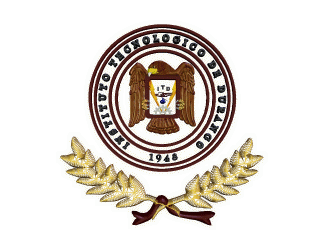
# Probabilidad y estadistica

## unidad 1

## Grupo: **2z**

### Practica 6.  Estadística descriptiva Dataset Autos

Alumno:Juan Pablo Urrutia Medrano

Docente: Dr: Jose Gabriel Rodriguez Rivas

1.- Cargar el Dataset de Autos y realizar las Estadísticas descriptivas básicas y medidas de tendencia central

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statistics import *

In [3]:
autos = pd.read_csv("autos2.csv", encoding = "ISO-8859-1")

In [4]:

autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0



Valores Maximos y minimos de los precios de los autos

In [5]:
autos.price.max()

45400.0

In [6]:

autos.price.min()

5118.0

Media, mediana y moda de los precios de los autos

In [24]:
# Media
Precios = autos['price'].dropna()

media = sum(Precios) / len(Precios)
print(media)

13207.129353233831


In [8]:
# Mediana
mediana = median(autos.price)
print(mediana)

18150.0


In [11]:

# Moda
moda = multimode(autos.price)
print(moda)

[16500.0, 5572.0, 7957.0, 6229.0, 6692.0, 7609.0, 8921.0, 7295.0, 8845.0, 8495.0, 9279.0, 13499.0, 18150.0, 7775.0, 7898.0]


Desviación estandar de los precios de los autos

In [15]:
desviacion_estandar_precioa = autos.price.std()
print(desviacion_estandar_precioa)


7947.066341939271


Estadisticos y cuartiles de los precios de los autos

In [14]:
autos.price.describe()


,price
count,201.000000
mean,13207.129353
std,7947.066342
min,5118.000000
25%,7775.000000
50%,10295.000000
75%,16500.000000
max,45400.000000



2.-Realizar un Histograma de precios de los automóviles

In [17]:
import math

In [16]:
df = pd.DataFrame({'Precios': autos.price})
df

,Precios
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [18]:
# Calcular el número de intervalos utilizando la regla de Sturges
n = len(autos.price)
k = int( 1 + math.log2(100))
print("Valor de n = ", n , " \nNúmero de intervalos =", k)

Valor de n =  205  
Número de intervalos = 7


In [19]:
# Crear la tabla de frecuencias

tabla_frecuencia = pd.cut( df['Precios'], bins=k, include_lowest=True).value_counts().reset_index()
tabla_frecuencia.columns = ['Clase', 'Frec']
tabla_frecuencia

,Clase,Frec
0,"(5077.717, 10872.571]",105
1,"(10872.571, 16627.143]",49
2,"(16627.143, 22381.714]",26
3,"(33890.857, 39645.429]",7
4,"(28136.286, 33890.857]",6
5,"(22381.714, 28136.286]",5
6,"(39645.429, 45400.0]",3


In [20]:
# Ordenar la tabla de frecuencia por el intervalo
tabla_frecuencia = tabla_frecuencia.sort_values(by='Clase')
tabla_frecuencia

,Clase,Frec
0,"(5077.717, 10872.571]",105
1,"(10872.571, 16627.143]",49
2,"(16627.143, 22381.714]",26
5,"(22381.714, 28136.286]",5
4,"(28136.286, 33890.857]",6
3,"(33890.857, 39645.429]",7
6,"(39645.429, 45400.0]",3


In [21]:
# Generar columnas siguientes
tabla_frecuencia['Frec Rel'] = tabla_frecuencia['Frec'] / n
tabla_frecuencia['Frec Porc'] = tabla_frecuencia['Frec'] / n * 100
tabla_frecuencia['Frec Ac'] = tabla_frecuencia['Frec'].cumsum()
tabla_frecuencia['Frec Rel Ac'] = tabla_frecuencia['Frec Rel'].cumsum()
tabla_frecuencia['Frec Porc Ac'] = tabla_frecuencia['Frec Porc'].cumsum()

# Mostrar la tabla de frecuencia
print(tabla_frecuencia)


                    Clase  Frec  Frec Rel  Frec Porc  Frec Ac  Frec Rel Ac  \
0   (5077.717, 10872.571]   105  0.512195  51.219512      105     0.512195   
1  (10872.571, 16627.143]    49  0.239024  23.902439      154     0.751220   
2  (16627.143, 22381.714]    26  0.126829  12.682927      180     0.878049   
5  (22381.714, 28136.286]     5  0.024390   2.439024      185     0.902439   
4  (28136.286, 33890.857]     6  0.029268   2.926829      191     0.931707   
3  (33890.857, 39645.429]     7  0.034146   3.414634      198     0.965854   
6    (39645.429, 45400.0]     3  0.014634   1.463415      201     0.980488   

   Frec Porc Ac  
0     51.219512  
1     75.121951  
2     87.804878  
5     90.243902  
4     93.170732  
3     96.585366  
6     98.048780  


Text(0, 0.5, 'Autos')

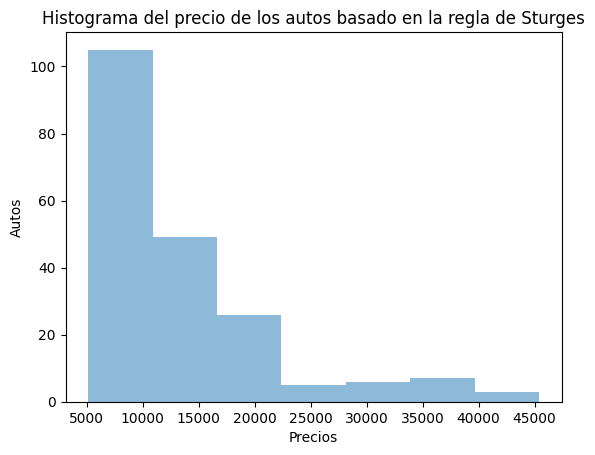

In [22]:
# Crear un histograma basado en la tabla de frecuencia
plt.hist(df['Precios'], bins=k, alpha = 0.5)
plt.title('Histograma del precio de los autos basado en la regla de Sturges')
plt.xlabel('Precios')
plt.ylabel('Autos')


# **Conclusiones**: La distribución de los precios de los autos en el histograma sigue una tendencia sesgada hacia la derecha, lo que indica que la mayoría de los autos tienen precios más bajos (entre $5,000 y $15,000). A medida que el precio aumenta, la frecuencia de autos en esos rangos disminuye drásticamente, lo que sugiere que los autos más caros son menos comunes en el conjunto de datos. Esta distribución es típica en mercados donde los autos más accesibles tienen una mayor demanda y disponibilidad en comparación con los modelos más costosos.


# **3.- Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y tipo de vehículo (body style)**

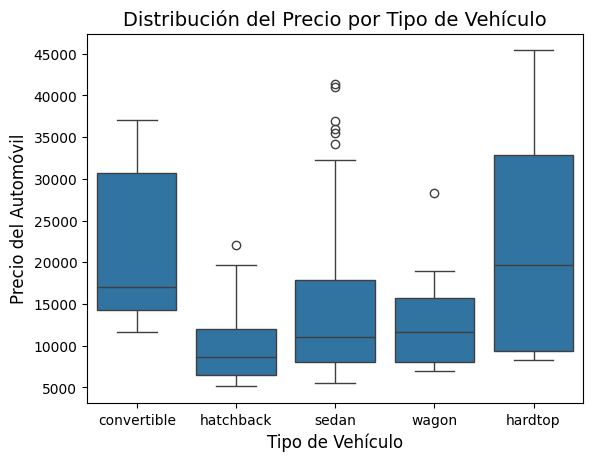

In [23]:
sns.boxplot(x='body-style', y='price', data = autos)
plt.title('Distribución del Precio por Tipo de Vehículo', fontsize=14)
plt.xlabel('Tipo de Vehículo', fontsize=12)
plt.ylabel('Precio del Automóvil', fontsize=12)
plt.show()

# **conclusion:** El diagrama de cajas muestra la distribución de los precios según el tipo de vehículo. Se observa que los convertibles y hardtops tienen los precios más altos y una mayor variabilidad en comparación con los demás tipos. En contraste, los hatchbacks y wagons presentan precios más bajos y menos dispersión. Además, el tipo sedan muestra una gran cantidad de valores atípicos (outliers), lo que indica que existen algunos modelos significativamente más caros que la mayoría. Esto sugiere que los autos deportivos y de lujo (como convertibles y hardtops) tienden a tener un rango de precios más amplio y pueden alcanzar valores más elevados.

4.- Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y tipo tracción ruedas (drive wheels)

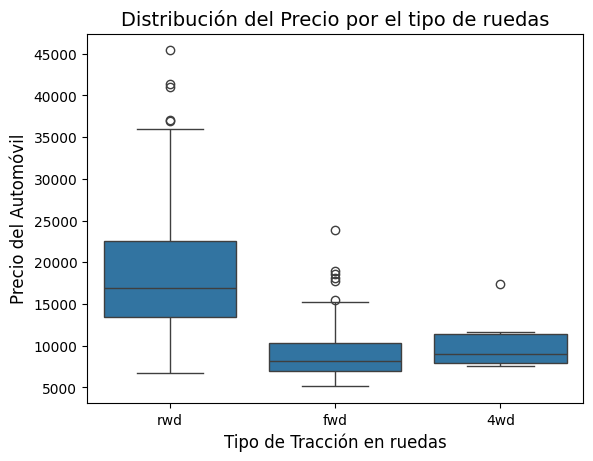

In [25]:
sns.boxplot(x='drive-wheels', y='price', data = autos)
plt.title('Distribución del Precio por el tipo de ruedas', fontsize=14)
plt.xlabel('Tipo de Tracción en ruedas', fontsize=12)
plt.ylabel('Precio del Automóvil', fontsize=12)
plt.show()


El gráfico muestra que los automóviles con tracción trasera (rwd) tienen una mayor variabilidad en los precios, con una mediana más alta en comparación con los vehículos de tracción delantera (fwd) y tracción en las cuatro ruedas (4wd). Además, los automóviles rwd presentan más valores atípicos con precios significativamente altos. Por otro lado, los vehículos fwd y 4wd tienden a tener precios más bajos y una distribución de precios más compacta.

# **5.- Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y la ubicación del motor (engine-location)**


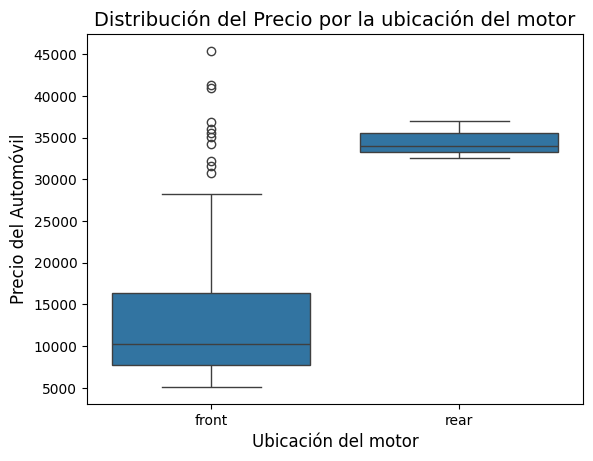

In [26]:
sns.boxplot(x='engine-location', y='price', data = autos)
plt.title('Distribución del Precio por la ubicación del motor', fontsize=14)
plt.xlabel('Ubicación del motor', fontsize=12)
plt.ylabel('Precio del Automóvil', fontsize=12)
plt.show()


Los automóviles con motor ubicado en la parte trasera (rear) tienen precios más elevados y menos dispersión en comparación con aquellos con motor delantero (front). La mayoría de los vehículos con motor delantero tienen precios más bajos, pero con una gran cantidad de valores atípicos que alcanzan precios altos.

# **Conclusión general**
La ubicación del motor y el tipo de tracción influyen significativamente en el precio de los automóviles. Los vehículos con motor trasero y tracción trasera suelen ser más costosos, lo que sugiere que estas características están asociadas con modelos de gama alta o de alto rendimiento. En cambio, los automóviles con tracción delantera y motor delantero tienden a ser más accesibles, con una distribución de precios más baja y compacta.